In [1]:
import scipy.io.wavfile as sciw
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [2]:
def make_tone(freq, length, sr):
    return np.int16(np.sin(np.linspace(0, 2*np.pi*freq*length, sr*length))*(2**15-1))

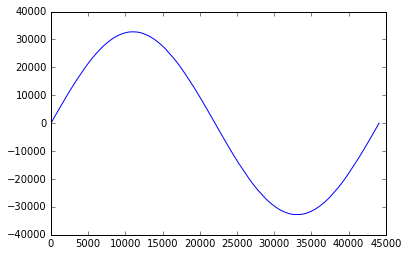

In [3]:
plt.plot(make_tone(1, 1, 44100))
plt.show()

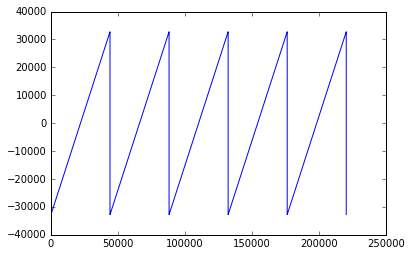

In [4]:
def make_sawtooth(freq, length, sr):
    return np.int16(signal.sawtooth(2*np.pi*np.linspace(0, length, length*sr), 1)*(2**15-1))

plt.plot(make_sawtooth(1, 5, 44100))
plt.show()

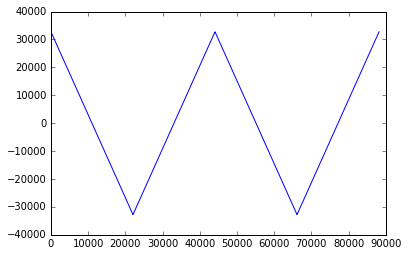

In [5]:
def make_triangle(freq, length, sr):
    return np.int16((np.absolute(signal.sawtooth(2*np.pi*np.linspace(0, 
        length, length*sr), 1))*2.0-1.0)*(2**15-1))

plt.plot(make_triangle(1, 2, 44100))
plt.show()

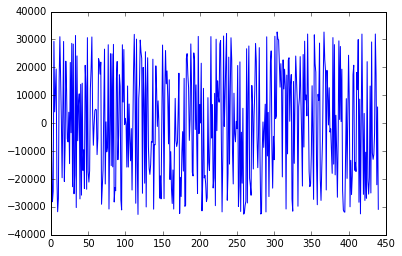

In [6]:
def make_random(freq, length, sr):
    return np.int16((np.tile(np.random.random(int(sr*1.0/freq)), freq*length)*2.0-1.0)*(2**15-1))

plt.plot(make_random(100, 0.01, 44100))
plt.show()

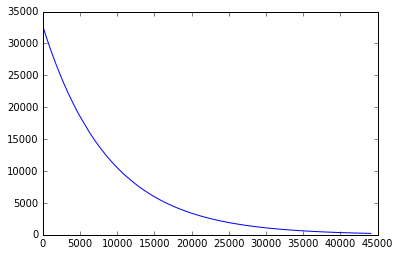

In [7]:
def envelope_exponential(song):
    return np.int16(song/np.exp(np.linspace(0, 5, len(song))))

plt.plot(envelope_exponential(np.ones(44100*1)*(2**15-1)))
plt.show()

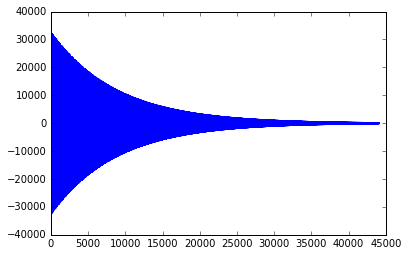

In [8]:
plt.plot(envelope_exponential(make_tone(2000, 1, 44100)))
plt.show()

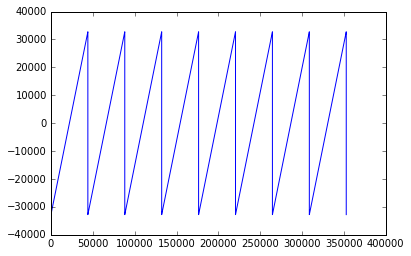

In [9]:
# WRITING EIGHT CONSECUTIVE OCATAVES
init_freq = 110
freqs = [init_freq]
for i in range(7):
    freqs.append(2*freqs[-1])
song = []
for f in freqs:
    song.extend(make_sawtooth(f, 1, 44100))
    
sciw.write("Ocatave.wav", 44100, np.int16(song))
plt.plot(song)
plt.show()

1. http://stackoverflow.com/questions/12332392/triangle-wave-shaped-array-in-python
2. http://stackoverflow.com/questions/22634265/python-concatenate-or-clone-a-numpy-array-n-times